In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import imghdr
import os 
import random
random.seed(46)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
gpus

In [5]:
# avoid OOM errors by setting GPU memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [6]:
Dir = 'Disease_data_image'

In [7]:
image_exts = ['jpeg', 'png','jpg']

In [ ]:
image_exts

In [ ]:
for image_class in  os.listdir(Dir):
    for image in os.listdir(os.path.join(Dir, image_class)):
        print(image)

In [10]:
img = cv2.imread(os.path.join('Dir','cancer','2022_01_04_17_37_3550_2022_01_04_AI_Rad_Companion_CXR'))

In [11]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

In [ ]:
for image_class in os.listdir(Dir):
    for image in os.listdir(os.path.join(Dir,image_class)):
        image_path = os.path.join(Dir, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

In [ ]:
import logging

In [ ]:
logging.basicConfig(filename='error.log', level=logging.ERROR)
for image_class in os.listdir(Dir):
    for image in os.listdir(os.path.join(Dir, image_class)):
        image_path = os.path.join(Dir, image_class, image)
        try:
            # Attempt to read the image
            img = cv2.imread(image_path)

            # Check the image type
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)
            else:
                # Process the image
                pass

        except Exception as e:
            # Log the error and continue
            logging.error('Issue with image {}: {}'.format(image_path, str(e)))
            # Optionally, you can add the image_path to a list of corrupted images for further investigation

In [ ]:
batch_size = 32
img_width = 256
img_height = 256
channels = 3

In [ ]:
try:
    train_data = tf.keras.utils.image_dataset_from_directory(
        Dir,
        validation_split=0.1,
        subset="training",
        seed=126,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
except Exception as e:
    print(f"Error loading training data: {str(e)}")


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
    Dir,
    validation_split=0.1,
    subset= "validation",
    seed= 126,
    image_size=(img_height, img_width),
    batch_size= batch_size
)

In [ ]:
class_names = train_data.class_names
print(class_names)

In [ ]:
data_iterator = val_data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

In [ ]:
batch[1]

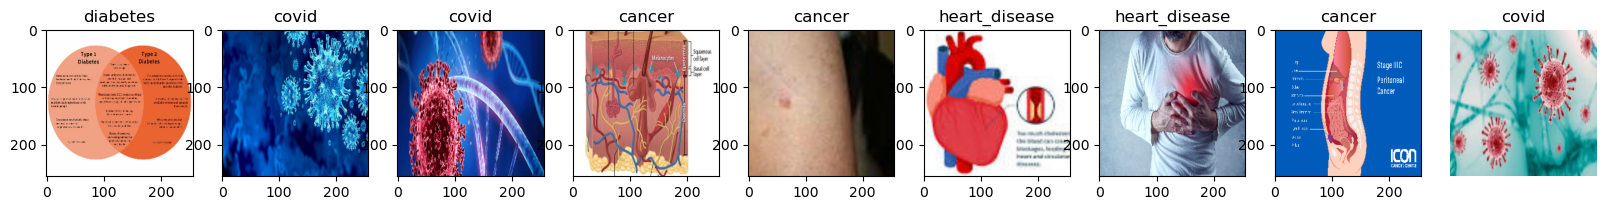

In [ ]:
fig, ax = plt.subplots(ncols=9, figsize=(20,20)) # plt subplots plot the image 
for idx, (img, label) in enumerate(zip(batch[0][:9], batch[1][:9])): # this iterates over the labels only the batch starting to 1
                #    plt.subplot(3,3, img + 1)   
                   ax[idx].imshow(img.astype("uint8")) 
                   ax[idx].title.set_text(class_names[label]) # and here we're getting t to label while iterating 
                   plt.axis("off")
                   

Preprocessing


In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.max()

1.0

In [ ]:
data = val_data.map(lambda x,y: (tf.image.resize(x, (img_height, img_width)), y)) # reshape your data to use and feed the convo2d a dimensional array

In [ ]:
scaled_iterator_1=data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator_1.next()

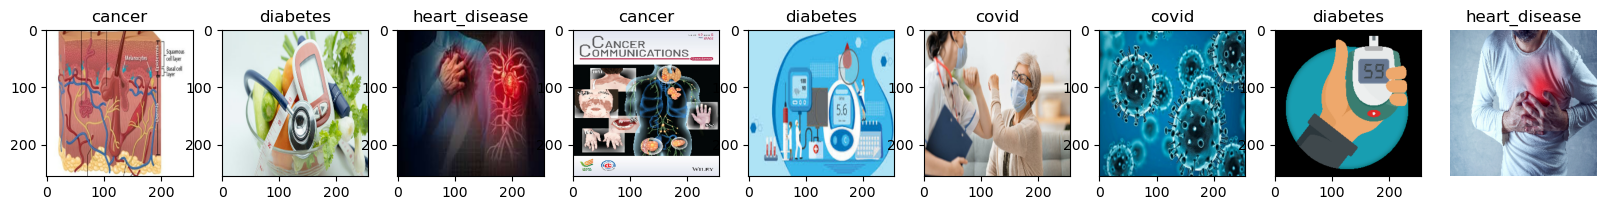

In [ ]:
fig, ax = plt.subplots(ncols=9, figsize=(20,20)) # plt subplots plot the image 
for idx, (img, label) in enumerate(zip(batch[0][:9], batch[1][:9])): # this iterates over the labels only the batch starting to 1
                #    plt.subplot(3,3, img + 1)   
                   ax[idx].imshow(img.astype("uint8"))
                   ax[idx].title.set_text(class_names[label]) # and here we're getting t to label while iterating 
                   plt.axis("off")
                   

In [ ]:
batch[0].min()

0.0

Data splitting

In [ ]:
train_size = int(len(data)*7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

Skip/Take

In [ ]:
train = val_data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
model = Sequential()
# model.add(layers.Flatten(input_shape=(32,32,3)))

In [ ]:
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile ('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir = 'log'

In [ ]:
tensor_board = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
epochs = 15
hist = model.fit(train, epochs=epochs, validation_data=val_data, callbacks=[tensor_board])

Epoch 1/15


2/2 [==============================] - 4s 2s/step - loss: -257.8966 - accuracy: 0.2692 - val_loss: -1892.2883 - val_accuracy: 0.2692
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: -1951.3789 - accuracy: 0.2692 - val_loss: -4845.4980 - val_accuracy: 0.2692
Epoch 3/15
2/2 [==============================] - 2s 1s/step - loss: -5809.0884 - accuracy: 0.2692 - val_loss: -9638.3516 - val_accuracy: 0.2692
Epoch 4/15
2/2 [==============================] - 2s 1s/step - loss: -10560.0508 - accuracy: 0.2692 - val_loss: -17709.1016 - val_accuracy: 0.2692
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: -18287.1973 - accuracy: 0.2692 - val_loss: -30082.6875 - val_accuracy: 0.2692
Epoch 6/15
2/2 [==============================] - 2s 1s/step - loss: -31421.8359 - accuracy: 0.2692 - val_loss: -48745.5000 - val_accuracy: 0.2692
Epoch 7/15
2/2 [==============================] - 2s 1s/step - loss: -53324.2969 - accuracy: 0.2692 - val_loss: -78320.9688 - val_accura

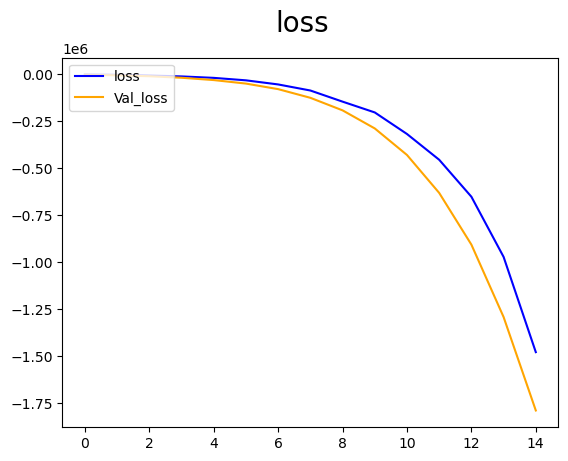

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='Val_loss')
plt.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'precission:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

precission:0.0, Recall:0.0, Accuracy:0.0


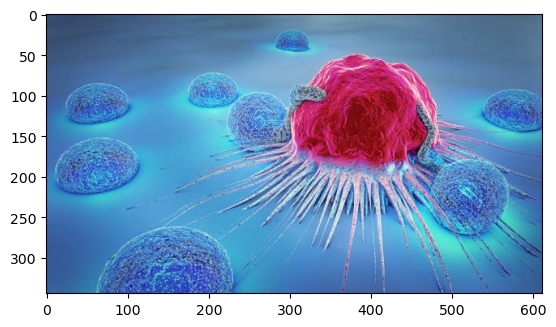

In [ ]:
img = cv2.imread('cancer.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

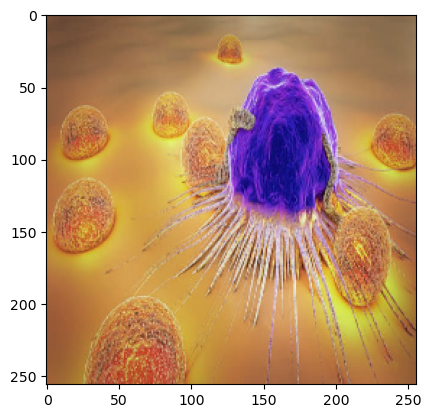

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0 ))

1/1 [==============================] - 0s 165ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
# model = tf.keras.models.load_model('Disease_CNN_1.h5')

def classify_image(image_path):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((225, 225))  # Resize to match your model's input size
    img = np.array(img) / 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(np.expand_dims(img, axis=0))

    # Define health condition categories
    health_conditions = ['Cancer', 'Diabetes', 'COVID', 'Heart Disease']

    # Find the category with the highest probability
    predicted_class = health_conditions[np.argmax(predictions)]

    return predicted_class

# Define the paths to your folders
class_names = ['cancer', 'diabetes', 'covid', 'heart_disease']
base_folder_path = 'Disease_data_image'  # Replace with the base folder path

# Iterate through the folders and classify images
for i, class_name in enumerate(class_names):
    folder_path = os.path.join(base_folder_path, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            predicted_class = classify_image(image_path)
            print(f'Image {filename} in {folder_path} is classified as {predicted_class}')


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'Disease_CNN_1.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'Disease_CNN_1.h5'))

In [ ]:
new_model